In [1]:
import cv2
import time
import matplotlib.pyplot as plt


<br><br>

explanation --> https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html<br>
for model training --> https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html <br>


<br><br>

## Image

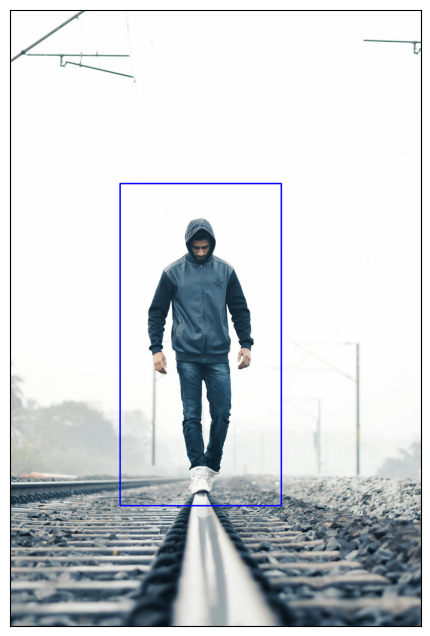

In [9]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')

# Read the image
image = cv2.imread(r"images/people.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=15, minSize=(100, 100))

"""
gray -->  input image in grayscale. . Face detection works more efficiently in grayscale

scaleFactor --> This parameter specifies how much the image size is reduced at each image scale. 
It is used to create a scale pyramid to detect objects at different sizes (because faces can appear larger or smaller depending on their distance from the camera).
1.1 means the image is reduced by 10% at each scale.

minNeighbors --> The detection algorithm finds multiple face candidates, and minNeighbors controls how many detections around the same region are needed to declare it a face.

minSize -->This parameter specifies the minimum size of the face to be detected, expressed as the width and height of the detection rectangle.

"""

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 5)

cv2.imwrite("result.jpg",image)


plt.figure(figsize=(15, 8))
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))



<br><br><br><br>

## Video

In [8]:
import cv2
import time

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')

# Capture video from a file or camera (use 0 for the default camera)
video_capture = cv2.VideoCapture(r"images/video.mp4")  # For a file
# video_capture = cv2.VideoCapture(0)  # For camera input

# Get the width and height of the frames
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object (MP4 format)
output_path = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 video
video_writer = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Start the time counter
prev_frame_time = 0
new_frame_time = 0

# Loop over frames from the video
while video_capture.isOpened():
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    if not ret:
        print("Finished processing or cannot read the video.")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(10, 10))

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 4)
        cv2.putText(frame, 'Body', (x + 75, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Calculate the FPS
    new_frame_time = time.time()
    fps = 1 / (new_frame_time - prev_frame_time)
    prev_frame_time = new_frame_time

    # Convert FPS to an integer for display
    fps = int(fps)
    fps_text = f'FPS: {fps}'

    # Put the FPS text on the top-right corner of the frame
    cv2.putText(frame, fps_text, (frame.shape[1] - 150, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)

    # Write the frame to the output video file
    video_writer.write(frame)

    # Display the resulting frame (optional, remove if not needed)
    cv2.imshow('Face Detection in Video with FPS', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects and close all windows
video_capture.release()
video_writer.release()
cv2.destroyAllWindows()

print(f"Video saved as {output_path}")


Video saved as output_video.mp4
